In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

In [2]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Sample_Submission.xlsx')

In [3]:
train.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [4]:
test.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,1,0,0,0


In [5]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
test.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.295812,0.120419,0.793194,0.054974,0.892670,0.052356,0.060209,0.107330,0.924084,0.005236,0.020942,0.031414
std,0.511221,0.325878,0.405547,0.228228,0.309938,0.223036,0.238186,0.309938,0.265211,0.072262,0.143379,0.174662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [8]:
test.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
dtype: int64

In [9]:
for c in train.columns :
    print(train[c].value_counts())

1    607
2    256
0     26
Name: Gender, dtype: int64
0    782
1    107
Name: Chain_smoker, dtype: int64
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
0    812
1     77
Name: HighBP, dtype: int64
1    817
0     72
Name: Obese, dtype: int64
0    840
1     49
Name: Diabetes, dtype: int64
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
1    823
0     66
Name: Family_history, dtype: int64
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
0    870
1     19
Name: CABG_history, dtype: int64
0    860
1     29
Name: Respiratory_illness, dtype: int64
no     699
yes    190
Name: UnderRisk, dtype: int64


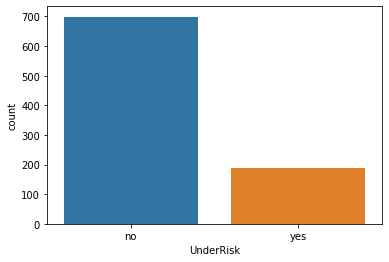

In [10]:
sns.countplot(train.UnderRisk)

# ANALYSIS

In [11]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            22
        yes            4
1       no           461
        yes          146
2       no           216
        yes           40
Name: UnderRisk, dtype: int64 


Chain_smoker  UnderRisk
0             no           598
              yes          184
1             no           101
              yes            6
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no           122
                                 yes           22
1                                no           577
                                 yes          168
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           652
        yes          160
1       no            47
        yes           30
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            59
       yes           13
1      no           640
       yes          177
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           65

In [12]:
ind_no = []
train = train.groupby('Family_history').get_group(1).reset_index(drop = True)
d = test[test.Family_history==0].index
ind_no.extend(d)
del train['Family_history']
del test['Family_history']
test.drop(index = d, inplace = True)
len(ind_no)

29

In [13]:
train = train.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = test[test.CABG_history==1].index.tolist()
del train['CABG_history']
del test['CABG_history']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

37

### Gen 1 -> Female

In [14]:
train[train.History_of_preeclampsia==1]

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,History_of_preeclampsia,Respiratory_illness,UnderRisk
31,1,1,1,0,1,1,0,0,1,0,no
53,1,0,1,0,1,0,0,0,1,0,no
139,1,0,1,0,1,0,0,0,1,0,no
159,1,0,1,0,1,0,0,0,1,0,no
292,1,1,1,0,1,1,0,0,1,0,no
304,0,0,1,0,1,0,0,0,1,0,no
384,1,1,1,0,1,0,0,0,1,0,no
426,1,0,1,0,1,1,0,0,1,0,no
445,1,0,1,0,1,1,0,0,1,0,no
451,1,1,1,0,1,0,0,0,1,0,no


In [15]:
train.drop(index=304, inplace = True)
train.reset_index(drop = True, inplace = True)

In [16]:
train = train.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = test[test.History_of_preeclampsia==1].index.tolist()
del train['History_of_preeclampsia']
del test['History_of_preeclampsia']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [17]:
train = train.groupby('Chain_smoker').get_group(0).reset_index(drop = True)
d = test[test.Chain_smoker==1].index.tolist()
del train['Chain_smoker']
del test['Chain_smoker']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

77

In [18]:
#del train['Metabolic_syndrome']
#del test['Metabolic_syndrome']

In [19]:
train.head(1)

,Gender,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
0,1,1,0,1,0,0,0,0,no


In [20]:
train['disease'] = train['HighBP']+train.Obese+train.Diabetes+train.Respiratory_illness
test['disease'] = test['HighBP']+test.Obese+test.Diabetes+test.Respiratory_illness

In [21]:
train['any_drug'] = train.Consumes_other_tobacco_products + train.Use_of_stimulant_drugs
test['any_drug'] = test.Consumes_other_tobacco_products + test.Use_of_stimulant_drugs

In [22]:
#tr = set(train.disease).difference(set(test.disease))
#te = set(test.disease).difference(set(train.disease))

#train.disease = train.disease.apply(lambda x: 'other' if x in tr else x).astype('category')
#test.disease = test.disease.apply(lambda x: 'other' if x in te else x).astype('category')

In [23]:
#val = {'no':['2010000','2001100', '2111000', '1100111', '1000101','1111000'],
#         'yes':['1101110','0110000']}

In [24]:
#d = list(test[test.disease.apply(lambda x: x in val['no'])].index)
#test.drop(index = d, inplace = True)
#ind_no.extend(d)

In [26]:
#ind_yes = []
#d = list(test[test.disease.apply(lambda x: x in val['yes'])].index)
#test.drop(index = d, inplace = True)
#ind_yes.extend(d)

In [27]:
for i,j in enumerate(train.columns):
    for c in train.columns[i+1:]:
        print('Columns Fixed v/s Variable:\t', j,c)
        print(train.groupby([j,c])['UnderRisk'].value_counts(),'\n\n')

Columns Fixed v/s Variable:	 Gender Consumes_other_tobacco_products
Gender  Consumes_other_tobacco_products  UnderRisk
0       0                                no             3
                                         yes            1
        1                                no            13
                                         yes            3
1       0                                no            31
                                         yes           19
        1                                no           279
                                         yes          122
2       0                                no            11
                                         yes            1
        1                                no           178
                                         yes           38
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 Gender HighBP
Gender  HighBP  UnderRisk
0       0       no            15
                yes            4
        1       n

Gender  Consumes_other_tobacco_products  UnderRisk
2       0                                no            11
                                         yes            1
                                         
Consumes_other_tobacco_products  Metabolic_syndrome  UnderRisk
0                                0                   no            43
                                                     yes           21
                                 1                   no             2
1                                0                   no           470
                                                     yes          161
                                 1                   yes            2
                                 
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            42
                                                      yes           21
                                 1                    no             3

Obese  Respiratory_illness  UnderRisk
0      0                    no            24
                            yes           11
       1                    yes            2

Use_of_stimulant_drugs  Respiratory_illness  UnderRisk
0                       0                    no           474
                                             yes          162
                        1                    no            16
                                             yes            9
1                       0                    no            25
                                             yes           11
                        1                    yes            2

Columns Fixed v/s Variable:	 Consumes_other_tobacco_products Respiratory_illness
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            65
                                                      yes           22
                                 1                    no             4
1                                0                    no           516
                                                      yes          157
                                 1                    no            14
                                                      yes           11

In [28]:
train.shape

(699, 11)

In [29]:
tr_dummies = pd.DataFrame(pd.get_dummies(train[['Gender','disease','any_drug']].astype('category')))
te_dummies = pd.DataFrame(pd.get_dummies(test[['Gender','disease','any_drug']].astype('category')))

train = pd.concat([train,tr_dummies],axis=1)
test = pd.concat([test,te_dummies],axis=1)

train.drop(columns=['Gender','disease','any_drug'],inplace=True)
test.drop(columns=['Gender','disease','any_drug'],inplace=True)

In [30]:
label = train.UnderRisk
label = label.apply(lambda x : 1 if (x=='yes') else 0)
train.drop(columns=['UnderRisk'],inplace=True)

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(ratio = 'auto')
x,y = sm.fit_sample(train, label)
train = pd.DataFrame(x, columns = train.columns)
label = pd.DataFrame(y)

In [31]:
515+184

699

In [32]:
label.shape

(699,)

In [33]:
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential

Using TensorFlow backend.


In [34]:
model = Sequential()
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(Dense(16, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [35]:
model.fit(train.values, to_categorical(label,2), batch_size=128, epochs = 100, validation_split=0.2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 559 samples, validate on 140 samples
Epoch 1/100
559/559 [==============================] - 0s 496us/step - loss: 0.9373 - accuracy: 0.4079 - val_loss: 0.7880 - val_accuracy: 0.2643
Epoch 2/100
559/559 [==============================] - 0s 18us/step - loss: 0.8407 - accuracy: 0.4580 - val_loss: 0.7453 - val_accuracy: 0.3000
Epoch 3/100
559/559 [==============================] - 0s 21us/step - loss: 0.8089 - accuracy: 0.5116 - val_loss: 0.7113 - val_accuracy: 0.3071
Epoch 4/100
559/559 [==============================] - 0s 18us/step - loss: 0.7806 - accuracy: 0.5420 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 5/100
559/559 [==============================] - 0s 23us/step - loss: 0.6982 - accuracy: 0.5975 - val_loss: 0.6687 - val_accuracy: 0.7143
Epoch 6/100
559/559 [==============================] - 0s 20us/step - loss: 0.7427 - accuracy: 0.5886 - val_loss: 0.6556 - val_accuracy: 0

559/559 [==============================] - 0s 20us/step - loss: 0.5590 - accuracy: 0.7370 - val_loss: 0.5488 - val_accuracy: 0.7571
Epoch 54/100
559/559 [==============================] - 0s 18us/step - loss: 0.5801 - accuracy: 0.7227 - val_loss: 0.5488 - val_accuracy: 0.7571
Epoch 55/100
559/559 [==============================] - 0s 18us/step - loss: 0.5584 - accuracy: 0.7496 - val_loss: 0.5494 - val_accuracy: 0.7571
Epoch 56/100
559/559 [==============================] - 0s 18us/step - loss: 0.5605 - accuracy: 0.7370 - val_loss: 0.5499 - val_accuracy: 0.7571
Epoch 57/100
559/559 [==============================] - 0s 20us/step - loss: 0.5553 - accuracy: 0.7460 - val_loss: 0.5504 - val_accuracy: 0.7571
Epoch 58/100
559/559 [==============================] - 0s 18us/step - loss: 0.5760 - accuracy: 0.7388 - val_loss: 0.5496 - val_accuracy: 0.7571
Epoch 59/100
559/559 [==============================] - 0s 16us/step - loss: 0.5696 - accuracy: 0.7388 - val_loss: 0.5486 - val_accuracy: 0.757

In [36]:
def model(m, split ,train, label, test, random, need = False):
    te = []
    strat = StratifiedKFold(n_splits= split, shuffle=True, random_state = random)
    for tr_index,te_index in strat.split(train,label):
        
        xtrain,xval = train.loc[tr_index,:],train.loc[te_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict_proba(xtrain)
        te_pred = m.predict_proba(xval)
        
        print('Training Loss :{}                                    Testing Loss : {}'.format(log_loss(ytrain,tr_pred),log_loss(yval,te_pred)))
        if need :
            te.append(pd.DataFrame(m.predict_proba(test), index = test.index))
    return(te)    

In [37]:
train.head()

,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Respiratory_illness,Gender_0,Gender_1,Gender_2,disease_0,disease_1,disease_2,disease_3,any_drug_0,any_drug_1,any_drug_2
0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


In [38]:
train.shape

(699, 17)

In [39]:
model(RandomForestClassifier(random_state=12312),5,train,label,test,2344)

Training Loss :0.5293612624537103                                    Testing Loss : 0.5954267634750875
Training Loss :0.5329909832004583                                    Testing Loss : 1.037358868391816
Training Loss :0.5366864343780627                                    Testing Loss : 0.5714056798578939
Training Loss :0.5383557595765776                                    Testing Loss : 0.5784798192728104
Training Loss :0.525898654875202                                    Testing Loss : 0.8367107465406365


[]

In [40]:
model(DecisionTreeClassifier(random_state=124),5,train,label,test,1323)

Training Loss :0.5263631424063743                                    Testing Loss : 1.492589226542008
Training Loss :0.5346121622098515                                    Testing Loss : 0.7920963136580044
Training Loss :0.531815806944492                                    Testing Loss : 0.7928133024696407
Training Loss :0.5265865071382851                                    Testing Loss : 1.0573286142238618
Training Loss :0.5254832359040833                                    Testing Loss : 0.8009000850779396


[]

In [41]:
result = model(LogisticRegression(random_state=9994),5,train,label,test,245993, need = True)

Training Loss :0.5470991456684382                                    Testing Loss : 0.5756812805413686
Training Loss :0.5519447166712294                                    Testing Loss : 0.5573861758649795
Training Loss :0.5505676108723834                                    Testing Loss : 0.5647298462790247
Training Loss :0.555338900914698                                    Testing Loss : 0.5499488798771793
Training Loss :0.5497037615741294                                    Testing Loss : 0.5682870973631158


In [42]:
model(GradientBoostingClassifier(random_state = 65444),5,train,label,test,331022)

Training Loss :0.5337045983107461                                    Testing Loss : 0.6079798069201706
Training Loss :0.53605629170873                                    Testing Loss : 0.5420739380772657
Training Loss :0.5240305879249263                                    Testing Loss : 0.6074985564570684
Training Loss :0.5370097604119706                                    Testing Loss : 0.5596580397989939
Training Loss :0.5207682195591808                                    Testing Loss : 0.6104579894104277


[]

In [108]:
result = model(SVC(probability=True, random_state=5410, kernel = 'rbf', C = 0.1),5,train,label,test,331022, True)

Training Loss :0.5792456175949549                                    Testing Loss : 0.579521302313049
Training Loss :0.5734721586053283                                    Testing Loss : 0.5766219998403658
Training Loss :0.5577442360819405                                    Testing Loss : 0.5980571493405805
Training Loss :0.573127122643178                                    Testing Loss : 0.5763226565221266
Training Loss :0.5679219040150678                                    Testing Loss : 0.5716740124082431


In [44]:
import lightgbm as lgb
import xgboost as xgb
result = model(lgb.LGBMClassifier(random_state=2993),5,train,label,test,34995, need = True)

Training Loss :0.553130583989807                                    Testing Loss : 0.5377264505983035
Training Loss :0.5474891046071124                                    Testing Loss : 0.5534576714410394
Training Loss :0.5417458964339801                                    Testing Loss : 0.5726890540756581
Training Loss :0.5397954333066434                                    Testing Loss : 0.5903487606881157
Training Loss :0.5393224672287427                                    Testing Loss : 0.5932622245709648


In [111]:
result = model(xgb.XGBClassifier(random_state=2304),5,train,label,test,34005, True)

Training Loss :0.5443159489490905                                    Testing Loss : 0.5541106915899685
Training Loss :0.5438374954813922                                    Testing Loss : 0.5741079867950507
Training Loss :0.5361567208666708                                    Testing Loss : 0.590579603505986
Training Loss :0.5364489260134628                                    Testing Loss : 0.5853343134479864
Training Loss :0.5396432627923786                                    Testing Loss : 0.563638286624881


In [45]:
result = model(StackingClassifier(final_estimator = LogisticRegression(random_state=12113),
                        estimators = [('lg', lgb.LGBMClassifier(random_state=31)),
                                      ('xg', xgb.XGBClassifier(random_state=311)),
                                      ('lr',LogisticRegression(random_state=990110))]),5,train,label,test,511200,True)

Training Loss :0.5539667591395946                                    Testing Loss : 0.5676336953971376
Training Loss :0.5580932156507082                                    Testing Loss : 0.5596285289832068
Training Loss :0.5521379236596659                                    Testing Loss : 0.5663647173184765
Training Loss :0.5520696572059516                                    Testing Loss : 0.5738434603766416
Training Loss :0.5520765026558281                                    Testing Loss : 0.5641725724310663


In [113]:
model(VotingClassifier(estimators = [('lg', lgb.LGBMClassifier(random_state=2)),
                                      ('xg', xgb.XGBClassifier(random_state=2)),
                                      ('lr',LogisticRegression(random_state=2))], voting = 'soft'),5,train,label,test,22)

Training Loss :0.5448610593291298                                    Testing Loss : 0.5598390663110098
Training Loss :0.5447279415220924                                    Testing Loss : 0.5622598859379582
Training Loss :0.5432558930141531                                    Testing Loss : 0.5742662684185268
Training Loss :0.5419344252065579                                    Testing Loss : 0.5682416666256184
Training Loss :0.538952779183394                                    Testing Loss : 0.5716019277865475


[]

In [46]:
temp = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no)
#temp3 = pd.DataFrame({0: 0.0, 1:1.0}, index = ind_yes)

In [47]:
result = pd.DataFrame({0:(result[0][0]+result[1][0]+result[2][0]+result[3][0]+result[4][0])/5,
             1:(result[0][1]+result[1][1]+result[2][1]+result[3][1]+result[4][1])/5}, index= result[0].index)

In [48]:
result = pd.concat([result,temp], axis = 0).sort_index()

In [49]:
result.shape

(382, 2)

In [50]:
sample.shape, result.shape

((382, 2), (382, 2))

In [51]:
result.columns= sample.columns

In [52]:
result

,no,yes
0,0.603522,0.396478
1,0.731974,0.268026
2,1.000000,0.000000
3,0.788598,0.211402
4,0.697032,0.302968
5,0.731974,0.268026
6,0.731974,0.268026
7,1.000000,0.000000
8,0.731974,0.268026
9,0.731974,0.268026


In [53]:
result.to_excel('stack_2.xlsx',index=False)